## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [822]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [823]:
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [1]:
# Library to help with data manipulation skipping numpy for now.
import pandas as pd
import numpy as np

df_original = pd.read_csv('Loan_Modelling.csv')

# creating copy so that original data is not modified
df = df_original.copy()

df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [825]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [826]:
df.shape

(5000, 14)

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns are integer columns. Zip code should be a string since calculating min,max and mean on zip code doesn't add any value

## Data Overview

* Observations
* Sanity checks

In [828]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Checking for missing values

In [829]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There is no missing value in this dataset.

### Checking for duplicate customer enteries

In [830]:
duplicate_customer_rows = df[df.duplicated(subset=['ID'],keep=False)]
print(len(duplicate_customer_rows))

0


This indicates that there are no duplicate rows for same customer id.

### Dropping ID column

In [831]:
df = df.drop(['ID'],axis=1)

Dropping unique customer identifier.

### Statistical Summary

In [832]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Observations on Data : 
1. Minimum of experience is negative.This needs to get fixed.
2. Zip code should be considered a string rather than numerical value.

### Processing Negative Experience values

In [833]:
# List all the values of experience column.
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [834]:
# List all the negative values of experience column.
df[df['Experience']<0]['Experience'].unique()

array([-1, -2, -3])

There is only a three instances where experience values are negative. It could very well be mistake. Let's change it to positive numbers.

In [835]:
df['Experience'] = df['Experience'].replace(-1,1)
df['Experience'] = df['Experience'].replace(-2,2)
df['Experience'] = df['Experience'].replace(-3,3)

In [836]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [837]:
len(df['Experience'])

5000

### Processing Categorical Columns

In [838]:
# Convert columns to Categorical data type.
df['ZIPCode'] = df['ZIPCode'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Personal_Loan'] = df['Personal_Loan'].astype('category')
df['Securities_Account'] = df['Securities_Account'].astype('category')
df['CD_Account'] = df['CD_Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [839]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [840]:
### function to plot distributions wrt target


def distribution_plot(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution plot for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        ax=axs[0, 0],
    )

    axs[0, 1].set_title("Distribution plot for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        ax=axs[0, 1],
    )

    axs[1, 0].set_title("Boxplot")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers)")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    plt.show()

### Univariate Analysis

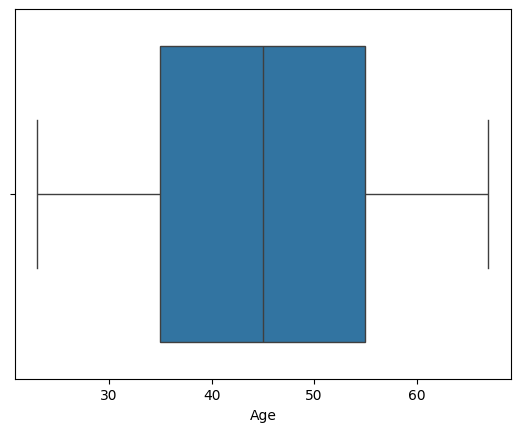

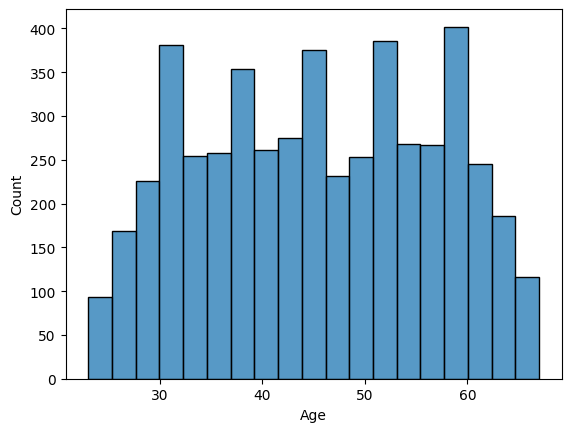

In [841]:
sns.boxplot(data=df,x='Age')
plt.show()
sns.histplot(data=df,x='Age')
plt.show()

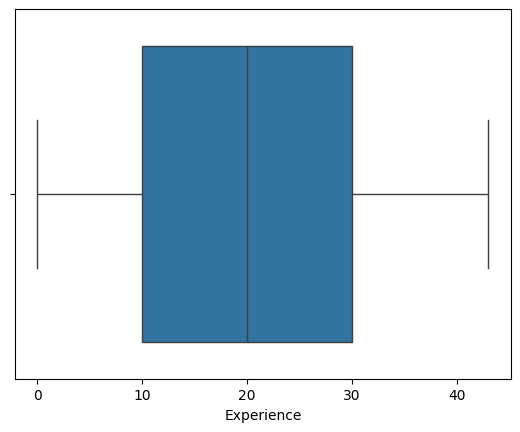

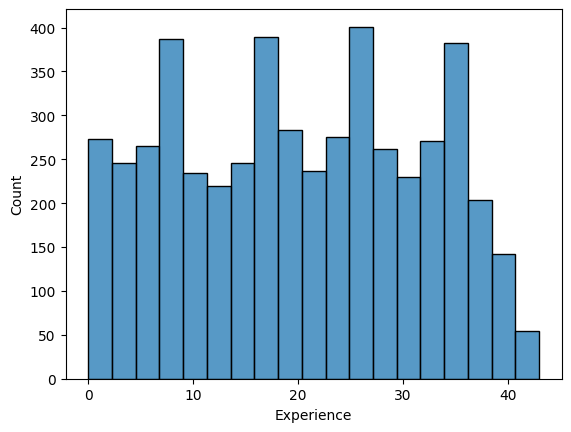

In [842]:
sns.boxplot(data=df,x='Experience')
plt.show()
sns.histplot(data=df,x='Experience')
plt.show()

Age and Experience data distribution looks similar. They could be related to each other.

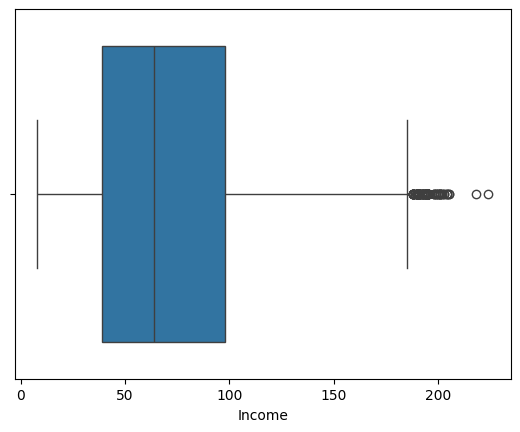

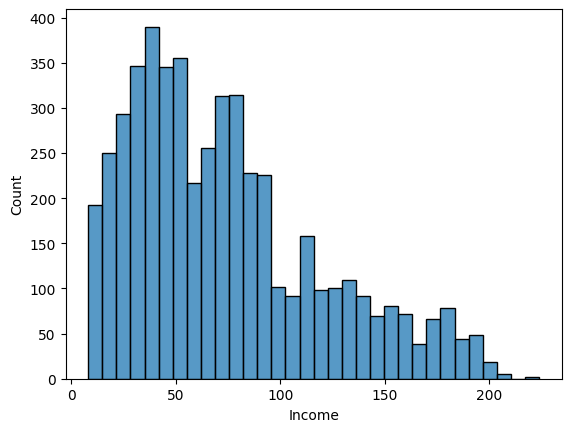

In [843]:
sns.boxplot(data=df,x='Income')
plt.show()
sns.histplot(data=df,x='Income')
plt.show()

There are multiple outliers for income and the distribution is right skewed.

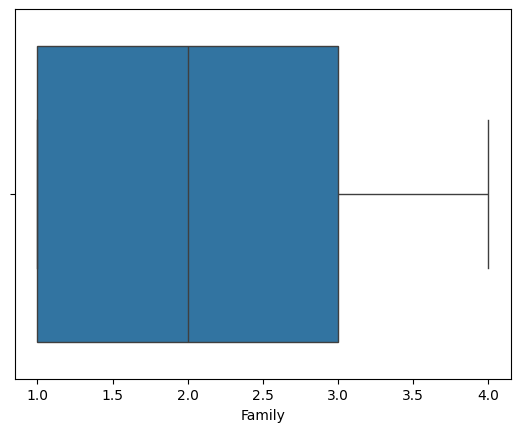

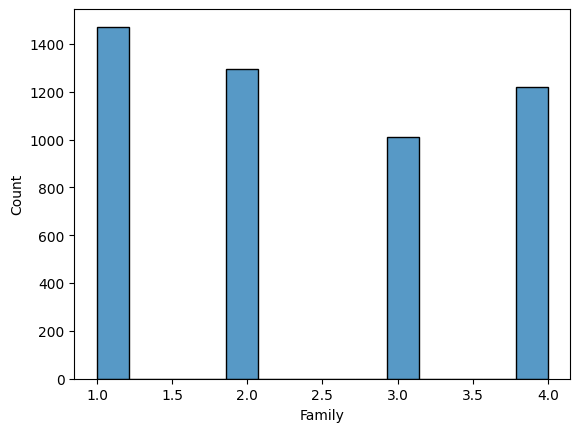

In [844]:
sns.boxplot(data=df,x='Family')
plt.show()
sns.histplot(data=df,x='Family')
plt.show()

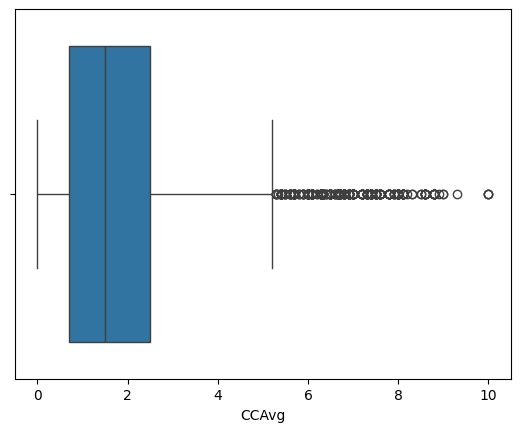

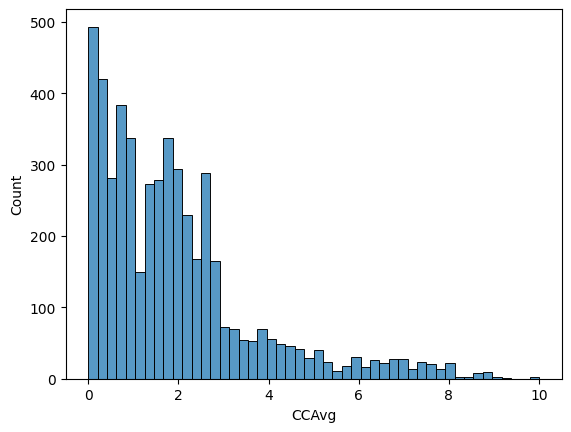

In [845]:
sns.boxplot(data=df,x='CCAvg')
plt.show()
sns.histplot(data=df,x='CCAvg')
plt.show()

There are multiple outliers and data is right skewed.

<Axes: xlabel='Mortgage'>

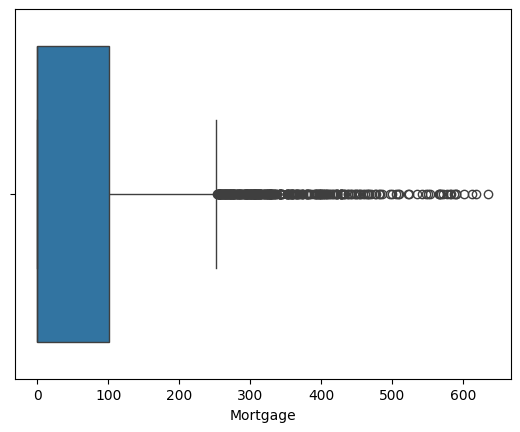

In [846]:
# Question -1 What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
sns.boxplot(data=df,x='Mortgage')

There are multiple outliers

<Axes: xlabel='Mortgage', ylabel='Count'>

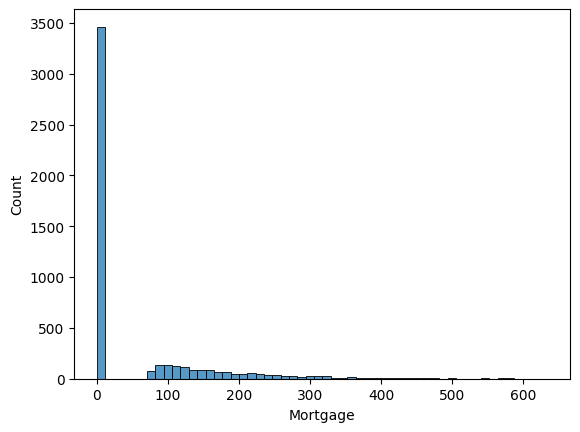

In [847]:
sns.histplot(data=df,x='Mortgage')

Most of the customers have mortgage amount of 0 and data is right skewed.

<Axes: xlabel='CreditCard', ylabel='count'>

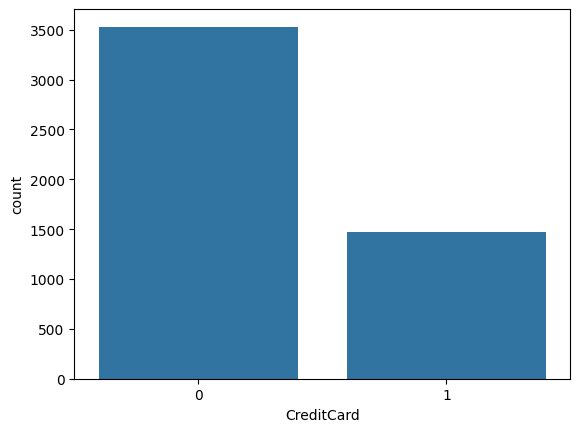

In [848]:
sns.countplot(data=df,x='CreditCard')

<Axes: xlabel='Education', ylabel='count'>

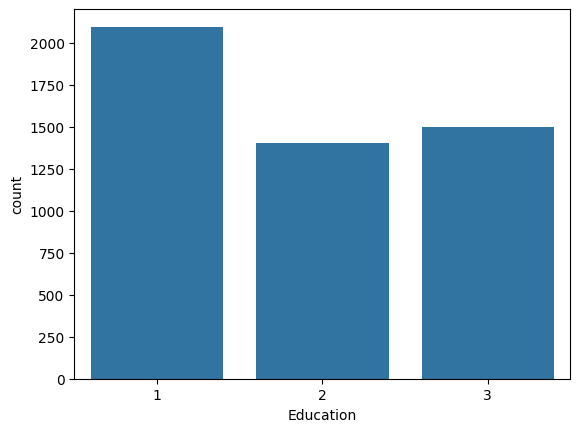

In [849]:
sns.countplot(data=df,x='Education')

<Axes: xlabel='Securities_Account', ylabel='count'>

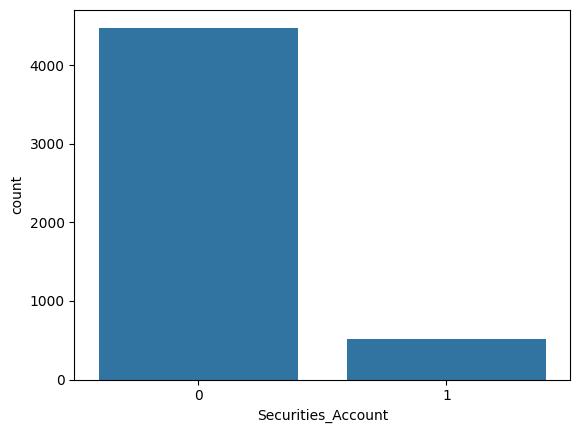

In [850]:
sns.countplot(data=df,x='Securities_Account')

<Axes: xlabel='CD_Account', ylabel='count'>

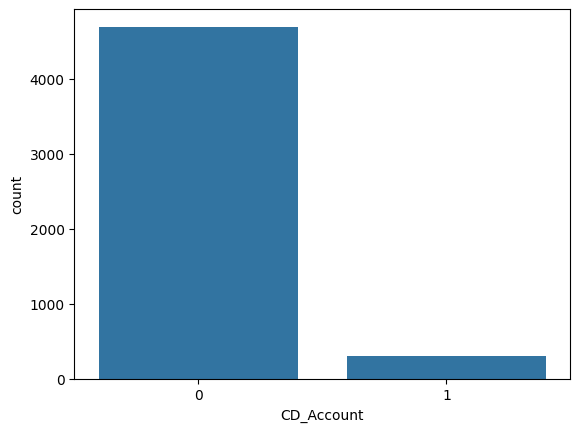

In [851]:
sns.countplot(data=df,x='CD_Account')

Customers who have CD_Account are very less.

<Axes: xlabel='Online', ylabel='count'>

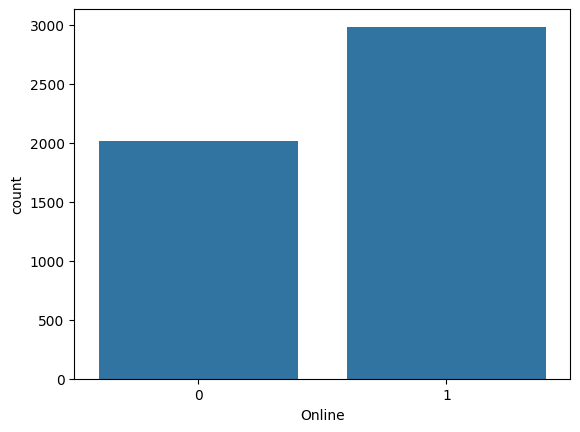

In [852]:
sns.countplot(data=df,x='Online')

In [853]:
df['ZIPCode'].unique()

[91107, 90089, 94720, 94112, 91330, ..., 90068, 94970, 90813, 94404, 94598]
Length: 467
Categories (467, int64): [90005, 90007, 90009, 90011, ..., 96094, 96145, 96150, 96651]

There are 467 categories for zip code which is not providing as much value when analyzing the countplot like this. 
Generally the first 2-3 digits represent the general area. Let's try to categorize zip code based on general area.

In [854]:
df['ZIPPrefix'] = df['ZIPCode'].astype(str).str[:3]
df['ZIPPrefix'] = df['ZIPPrefix'].astype('category')

<Axes: xlabel='ZIPPrefix', ylabel='count'>

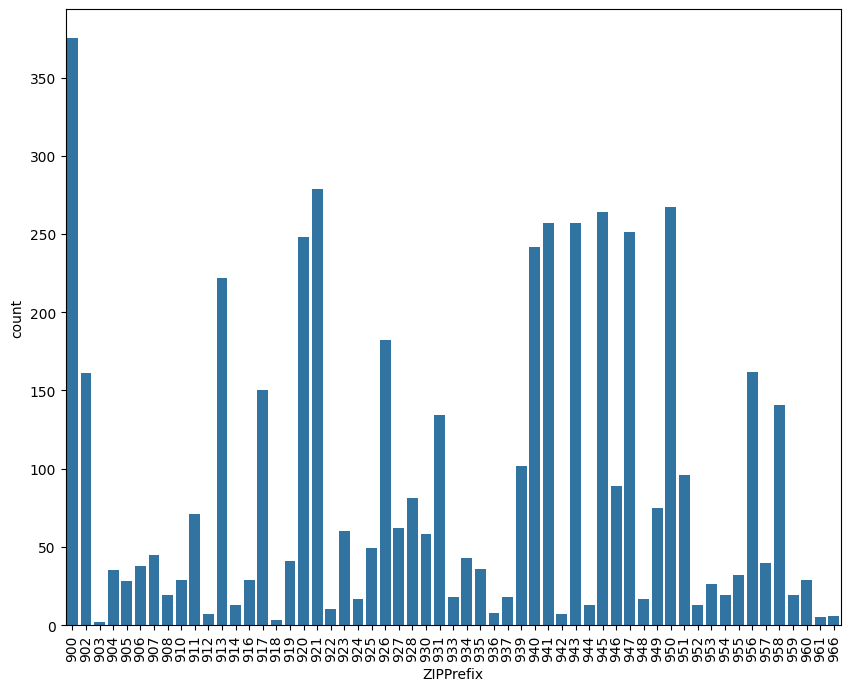

In [855]:
# Plot zip code effectively
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.countplot(data=df,x='ZIPPrefix')

### Bivariate Analysis

<Axes: xlabel='Family', ylabel='count'>

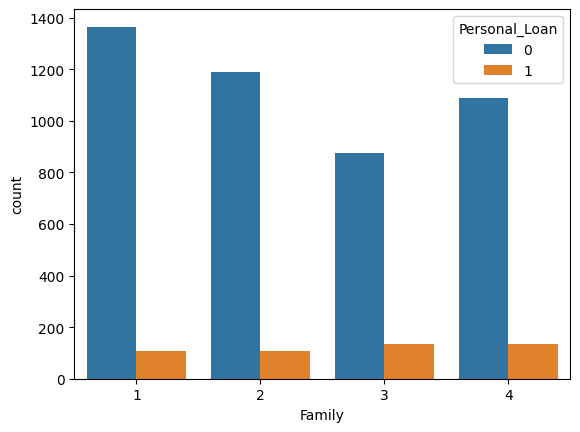

In [856]:
sns.countplot(data=df,x='Family',hue='Personal_Loan')

<Axes: xlabel='CD_Account', ylabel='count'>

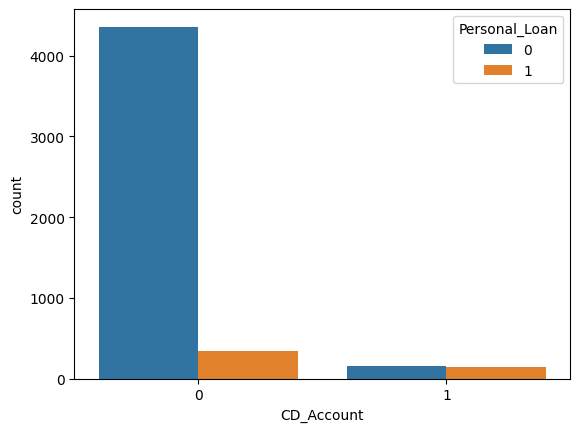

In [857]:
sns.countplot(data=df,x='CD_Account',hue='Personal_Loan')

Customers who have CD_Account has personal loan as well. These two seems to be positively corelated.

<Axes: xlabel='Securities_Account', ylabel='count'>

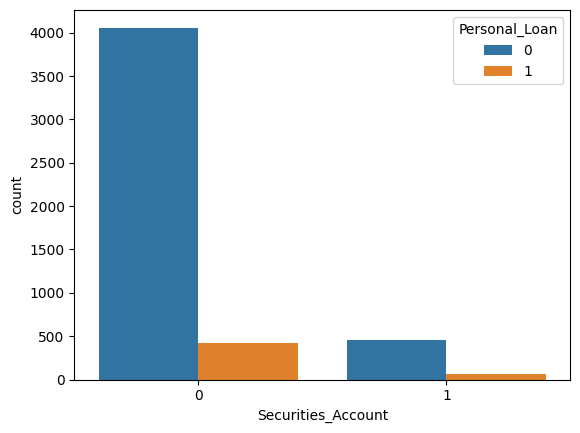

In [858]:
sns.countplot(data=df,x='Securities_Account',hue='Personal_Loan')

<Axes: xlabel='Online', ylabel='count'>

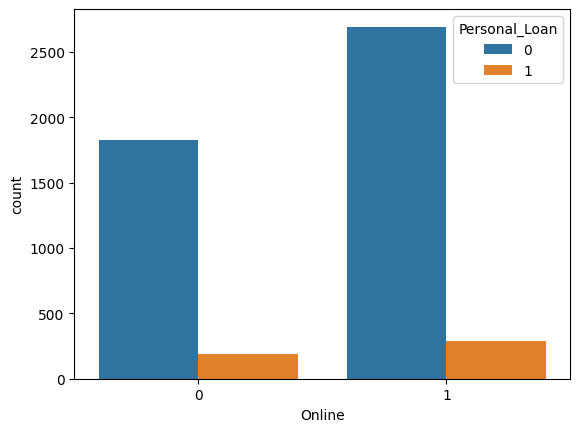

In [859]:
sns.countplot(data=df,x='Online',hue='Personal_Loan')

<Axes: xlabel='CreditCard', ylabel='count'>

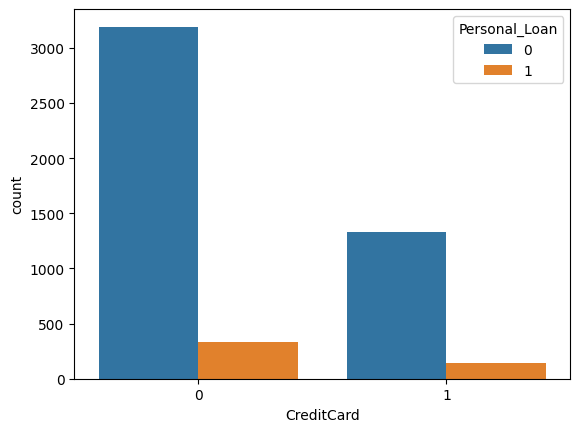

In [860]:
sns.countplot(data=df,x='CreditCard',hue='Personal_Loan')

<Axes: xlabel='ZIPPrefix', ylabel='count'>

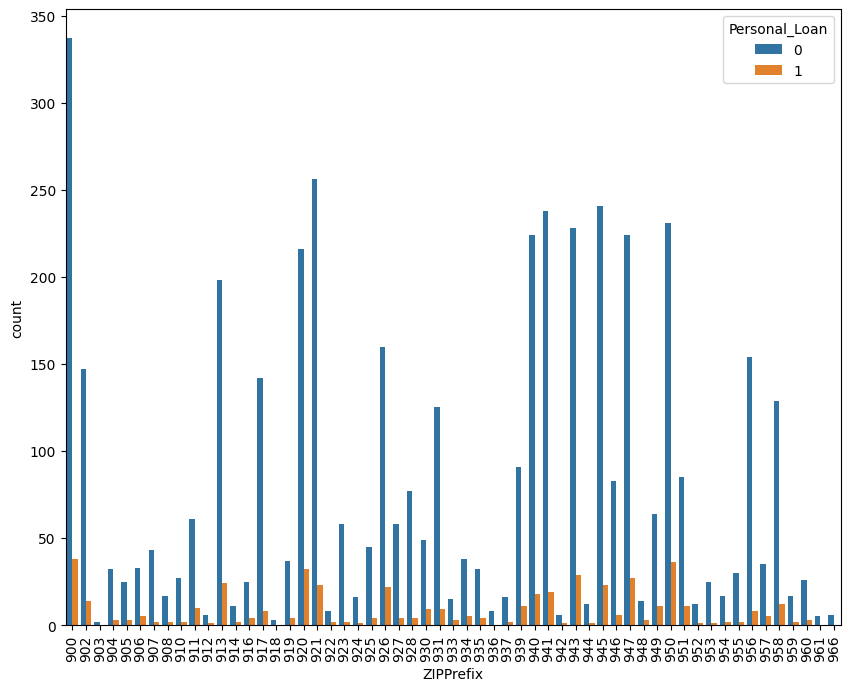

In [861]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.countplot(data=df,x='ZIPPrefix',hue='Personal_Loan')

Based on the data distribution there is no corelation between personal loans and the zip code of customers.

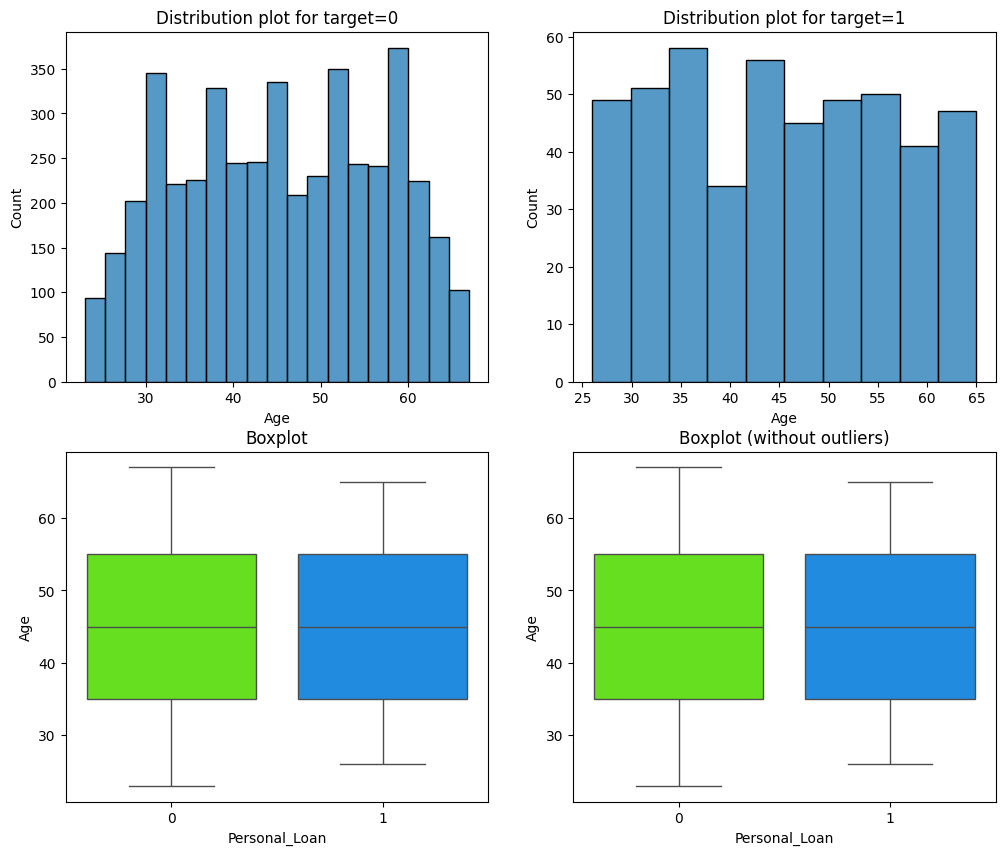

In [862]:
distribution_plot(df,'Age','Personal_Loan')

The minimum age of customers who has personal loans is greater than who do not have personal loans.
The maximum age of customers who has personal loans is smaller than who do not have personal loans. 
This could be an insight as to which age segment Bank should target to promote personal loans.

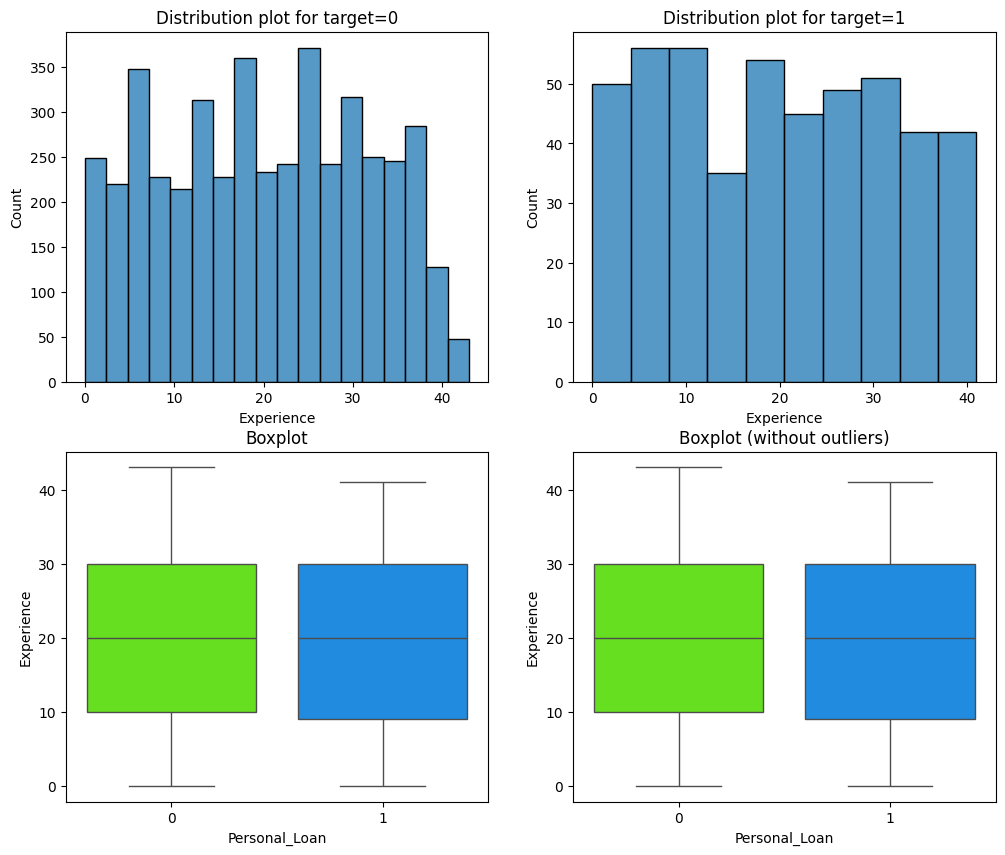

In [863]:
distribution_plot(df,'Experience','Personal_Loan')

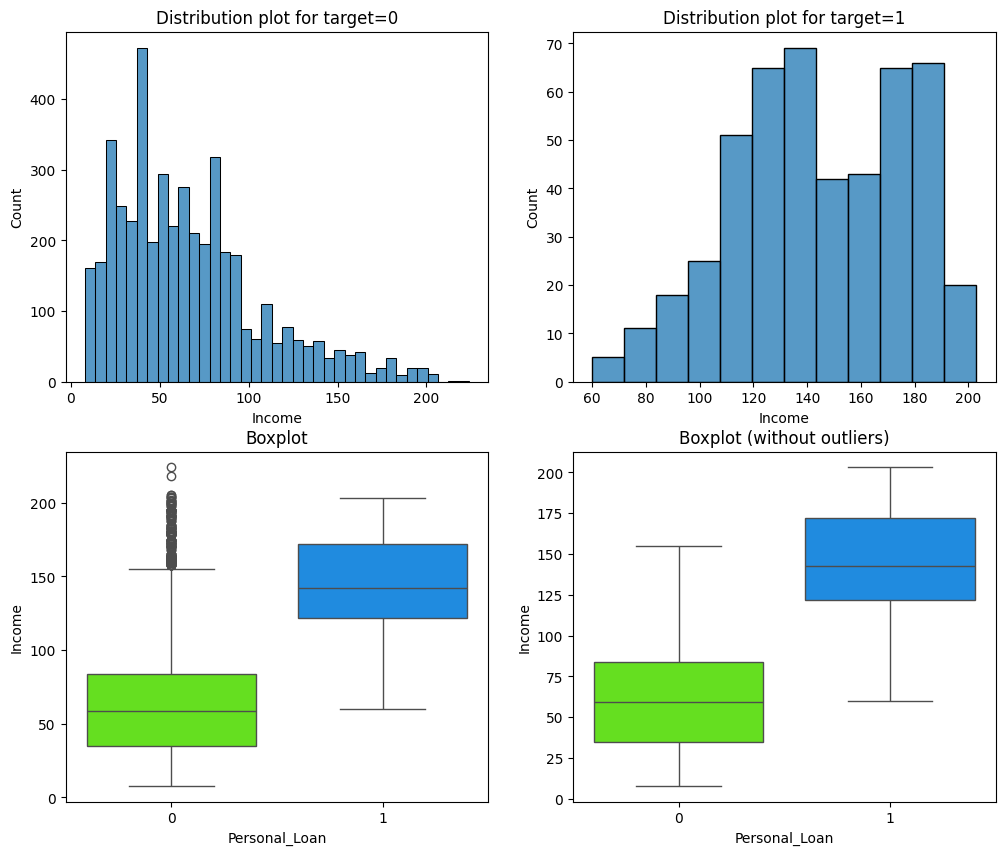

In [864]:
distribution_plot(df,'Income','Personal_Loan')

Customers who have personal loans also has higher income. This is great insight as to which segment Bank should target to promote personal loans.

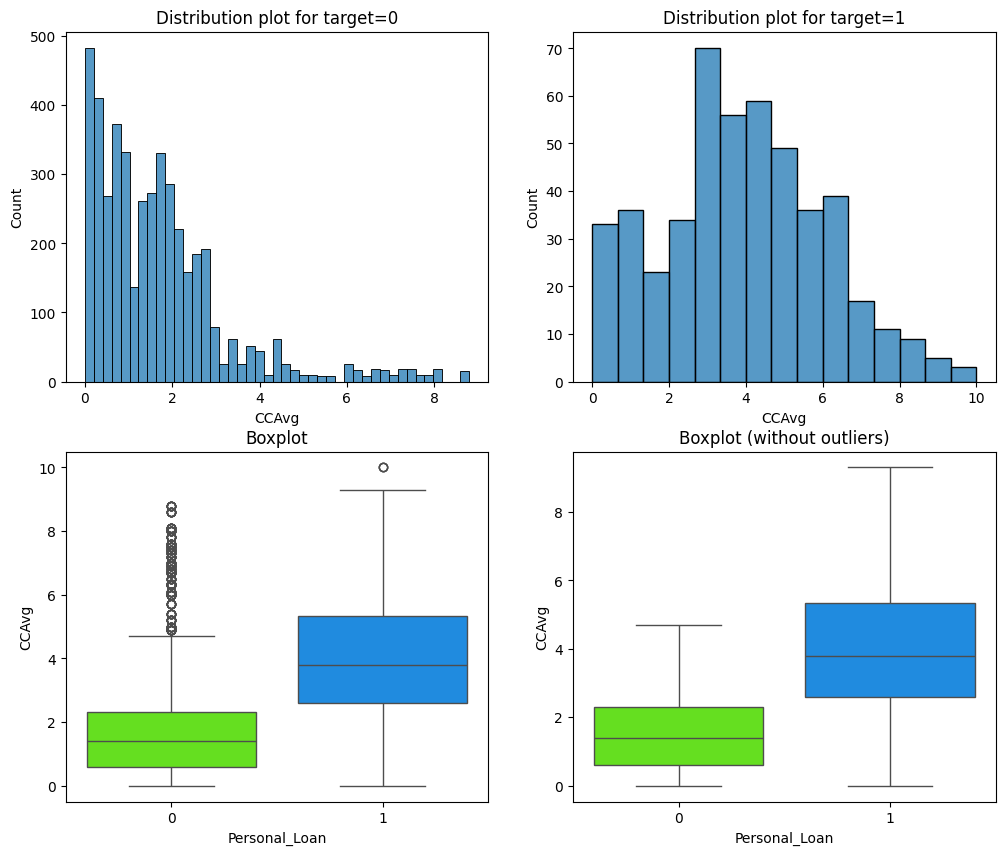

In [865]:
distribution_plot(df,'CCAvg','Personal_Loan')

### Question-1 What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

<Axes: xlabel='Mortgage'>

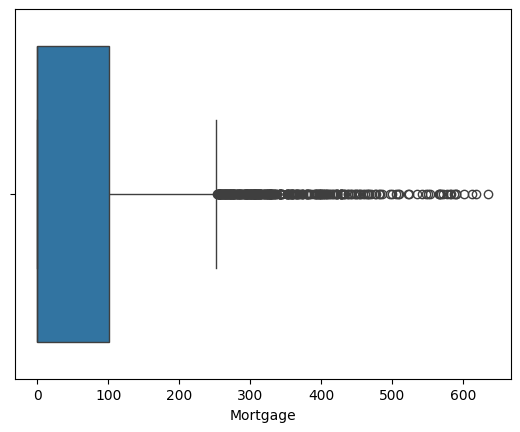

In [866]:
sns.boxplot(data=df,x='Mortgage')

There are multiple outliers in this distribution.

<Axes: xlabel='Mortgage', ylabel='Count'>

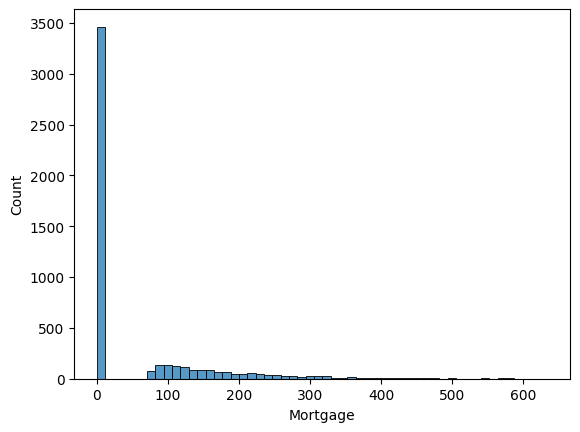

In [867]:
sns.histplot(data=df,x='Mortgage')

Most of the customers do not have any mortgage. Data is right skewed.

### Question-2 How many customers have credit cards?

In [868]:
credit_card = df[df['CreditCard']==1]
len(credit_card)

1470

1470 customers have credit card.

### Question-3 What are the attributes that have a strong correlation with the target attribute (personal loan)?

<Axes: >

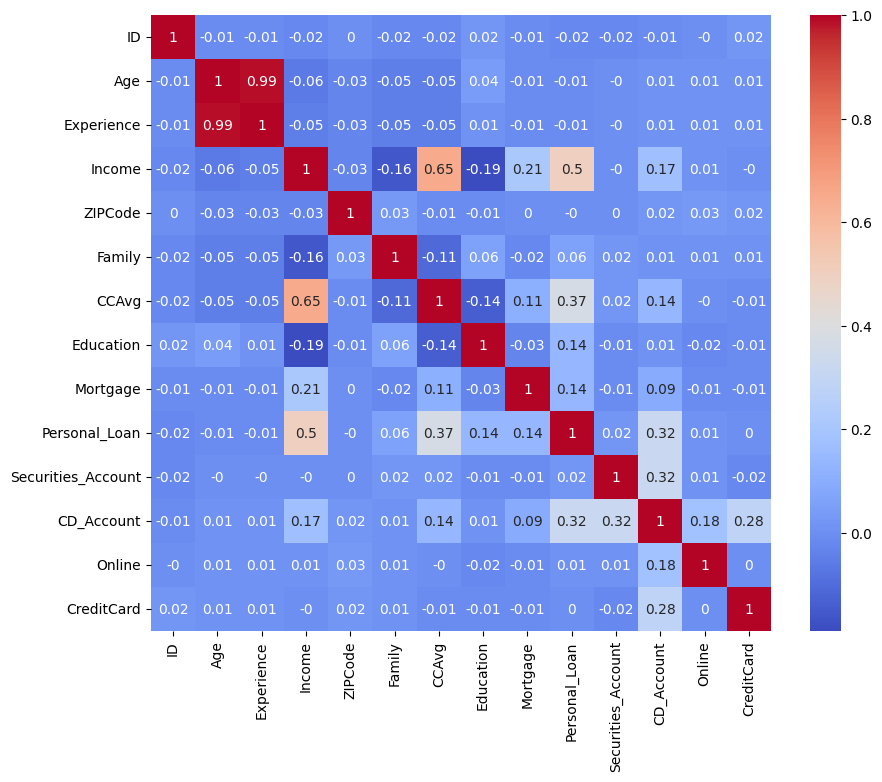

In [869]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_original.corr().round(2),annot=True,cmap='coolwarm')

Attributes that have strong correlation with personal loans are following:
* Income
* CCAvg
* CD_Account
* Education
* Mortgage



### Question-4 How does a customer's interest in purchasing a loan vary with their age?

<Axes: xlabel='Personal_Loan', ylabel='Age'>

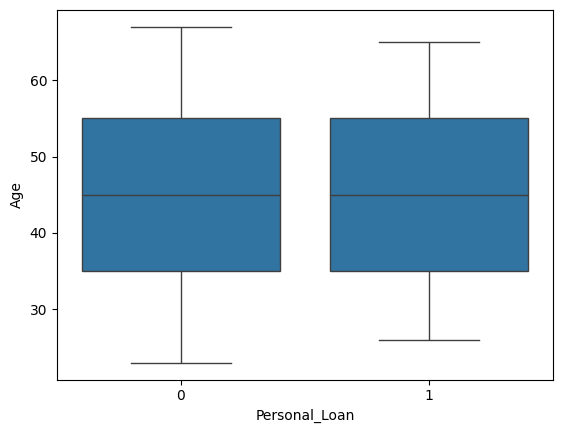

In [870]:
sns.boxplot(data=df,x='Personal_Loan',y='Age')

Based on the data distribution we can say that customers who are very young or older are not interested in purchasing personal loans.


### Question-5 How does a customer's interest in purchasing a loan vary with their education?

<Axes: xlabel='Education', ylabel='count'>

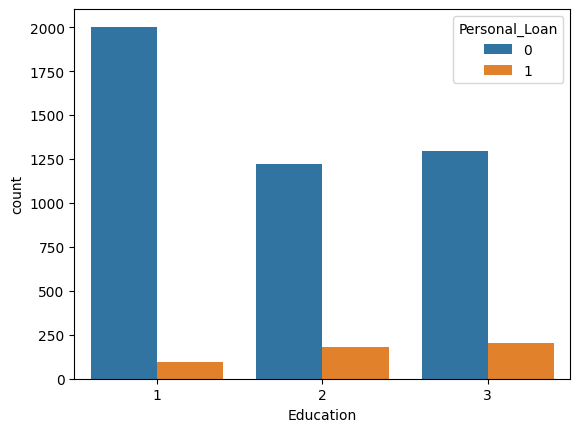

In [871]:

sns.countplot(data=df,x='Education',hue='Personal_Loan')

Based on data distribution it can be concluded that the customers with higher education is more interested in purchasing personal loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [872]:
# Missing values are analyzed already
# Dropping Experience column since its correlation with Age is very high
df = df.drop(['Experience'],axis=1)
df = df.drop(['ZIPCode','ZIPPrefix'],axis=1)

Reason for dropping Experience column is it is strongly corelated to Age column and hence not adding any unique value in modelling.

### Outlier Detection

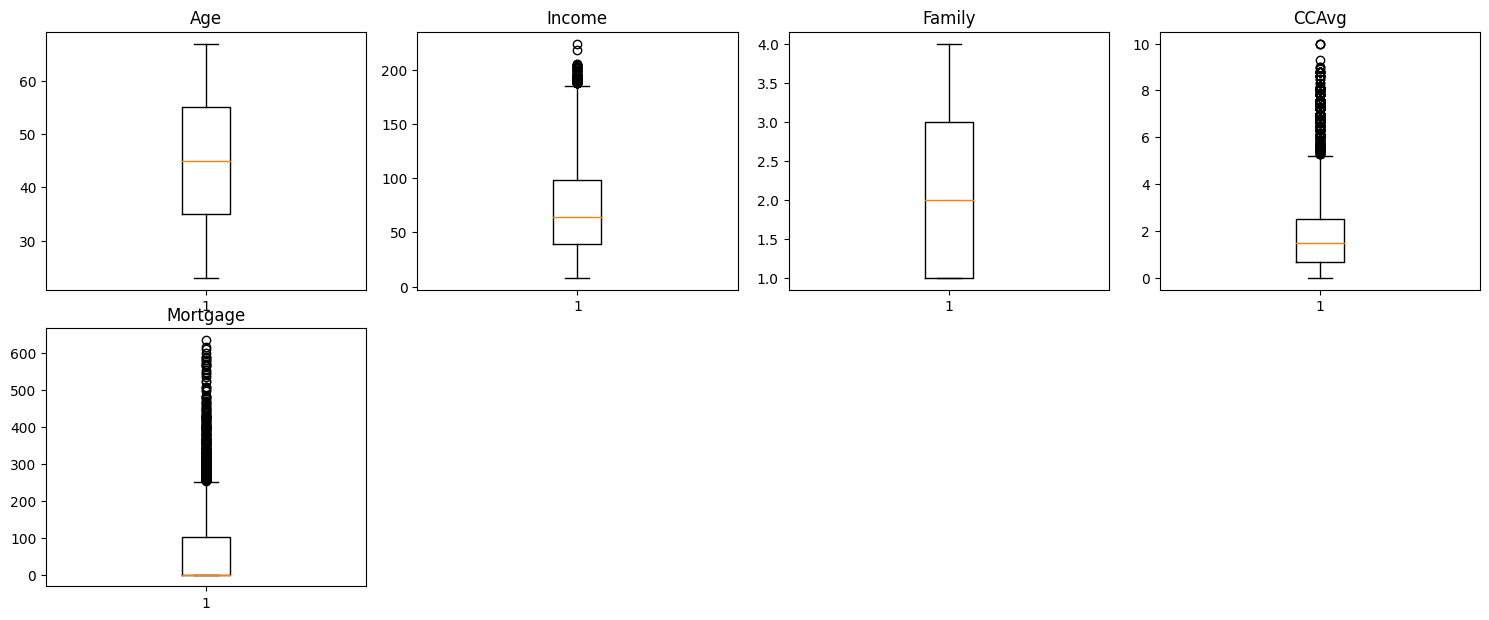

In [873]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

As we can see in the plot above there are multiple outliers but we will keep them since they are all valid values.
Removing these many outliers can lead to loosing valuable information.

### Necessary Imports

In [874]:
# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

### Preparing data for modeling

In [875]:
X = df.drop(["Personal_Loan"], axis=1)
Y = df["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [876]:
print("Percentage of Personal_Loan bought in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of Personal_Loan bought in test set:")
print(y_test.value_counts(normalize=True))

Percentage of Personal_Loan bought in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of Personal_Loan bought in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

* Model can make following wrong predictions:
  1. Predicting a customer will purchase personal loan but in reality customer does not. False Positive (FP)
  2. Predicting a customer will not purchase personal loan but in reality customer does. False Negative (FN)
* Why does this matter:
  1. If False Negatives are high potential buyers are overlooked reducing potential profit.
  2. If False Positives are high resources are wasted on non-interested customers.

We will be analyzing the Recall score to minimize the false negatives as we do not want to miss the potential buyers.


### Model Building

In [877]:
# Calculate Model metrics like accuracy, precision, recall and F1 score.
def model_performance_metrics(model,predictors,target):
    pred = model.predict(predictors)
    # Calculate accuracy
    accuracy = accuracy_score(target, pred)
    # Calculate recall score
    recall = recall_score(target, pred)
    # Calculate precision
    precision = precision_score(target, pred)
    # Calculate F1-score
    f1 = f1_score(target, pred)
    data = {'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision], 'F1-Score':[f1]}
    metrics = pd.DataFrame(data)

    return metrics

In [878]:
# Plots confusion matrix to have better understanding of how well model is performing.
def plot_confusion_matrix(data,data_pred):
    matrix = confusion_matrix(data,data_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [879]:
# Default Decision tree
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [880]:
model0_metrics_train = model_performance_metrics(model0,X_train,y_train)
print(model0_metrics_train)

   Accuracy  Recall  Precision  F1-Score
0       1.0     1.0        1.0       1.0


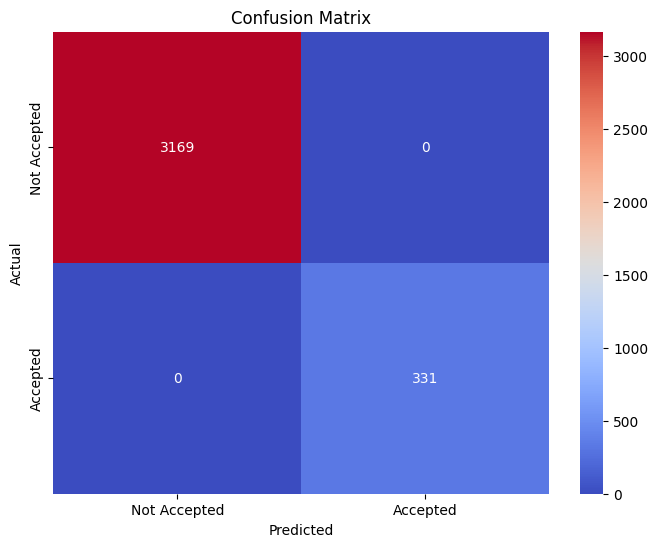

In [881]:
y_train_pred = model0.predict(X_train)
plot_confusion_matrix(y_train,y_train_pred)

In [882]:
model0_metrics_test = model_performance_metrics(model0,X_test,y_test)
print(model0_metrics_test)

   Accuracy    Recall  Precision  F1-Score
0  0.983333  0.892617    0.93662  0.914089


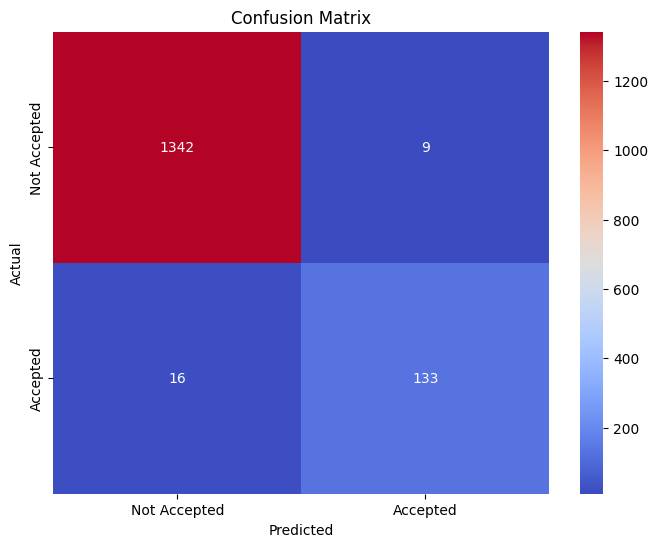

In [883]:
y_test_pred = model0.predict(X_test)
plot_confusion_matrix(y_test,y_test_pred)

Here confusion matrix indicates that the customer who predicted to not accept but in reality accepts the loan are little higher. Let's see if we can improve this number further without overfitting the model.

In [884]:
feature_names = list(X_train.columns)
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- CCAvg <= 2.65
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  2.65
|   |   | 

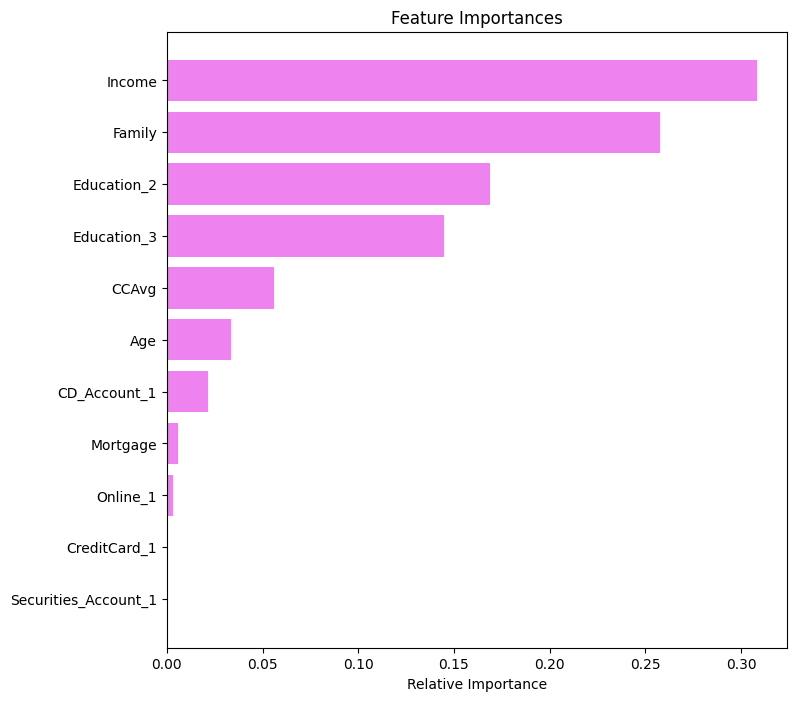

In [885]:
# importance of features in the tree building

importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Improvement

Let's try pruning techniques to reduce overfitting.

## Pre-pruning

In [886]:
max_depth_values = np.arange(4, 15)
max_leaf_nodes_values = [2,5,7,10,20,30,50]
min_samples_split_values = [2,3,5,10,20,30]

best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

model1 = best_estimator
model1_metrics_train = model_performance_metrics(model1,X_train,y_train)
print("----Train Data Metrics -----")
print(model1_metrics_train)
model1_metrics_test = model_performance_metrics(model1,X_test,y_test)
print("----Test Data Metrics -----")
print(model1_metrics_test)


----Train Data Metrics -----
   Accuracy    Recall  Precision  F1-Score
0  0.991429  0.927492   0.980831  0.953416
----Test Data Metrics -----
   Accuracy    Recall  Precision  F1-Score
0  0.983333  0.872483   0.955882  0.912281


### Pre pruning trained data confusion matrix

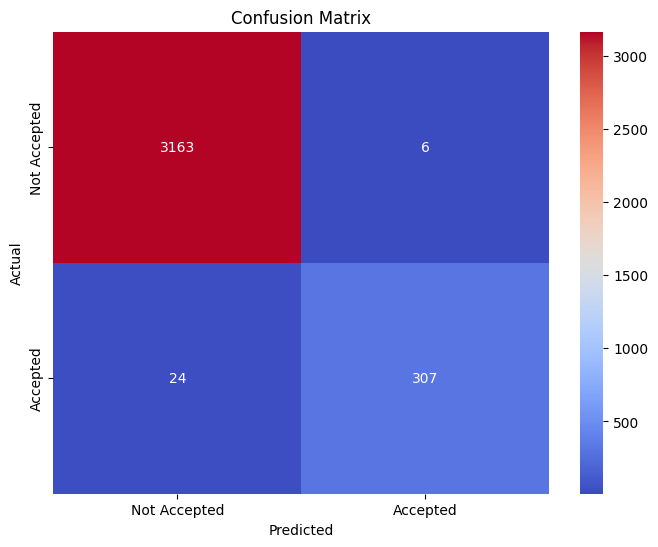

In [887]:
y_train_pred_model1 = model1.predict(X_train)
plot_confusion_matrix(y_train,y_train_pred_model1)

### Pre pruning trained data confusion matrix

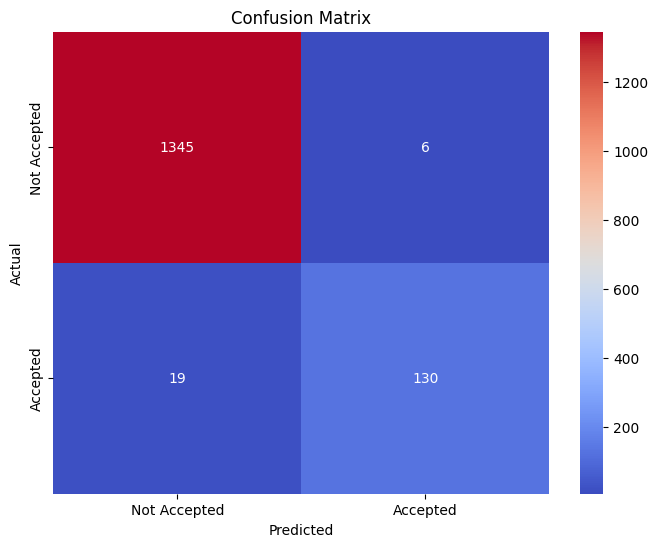

In [888]:
y_test_pred_model1 = model1.predict(X_test)
plot_confusion_matrix(y_test,y_test_pred_model1)

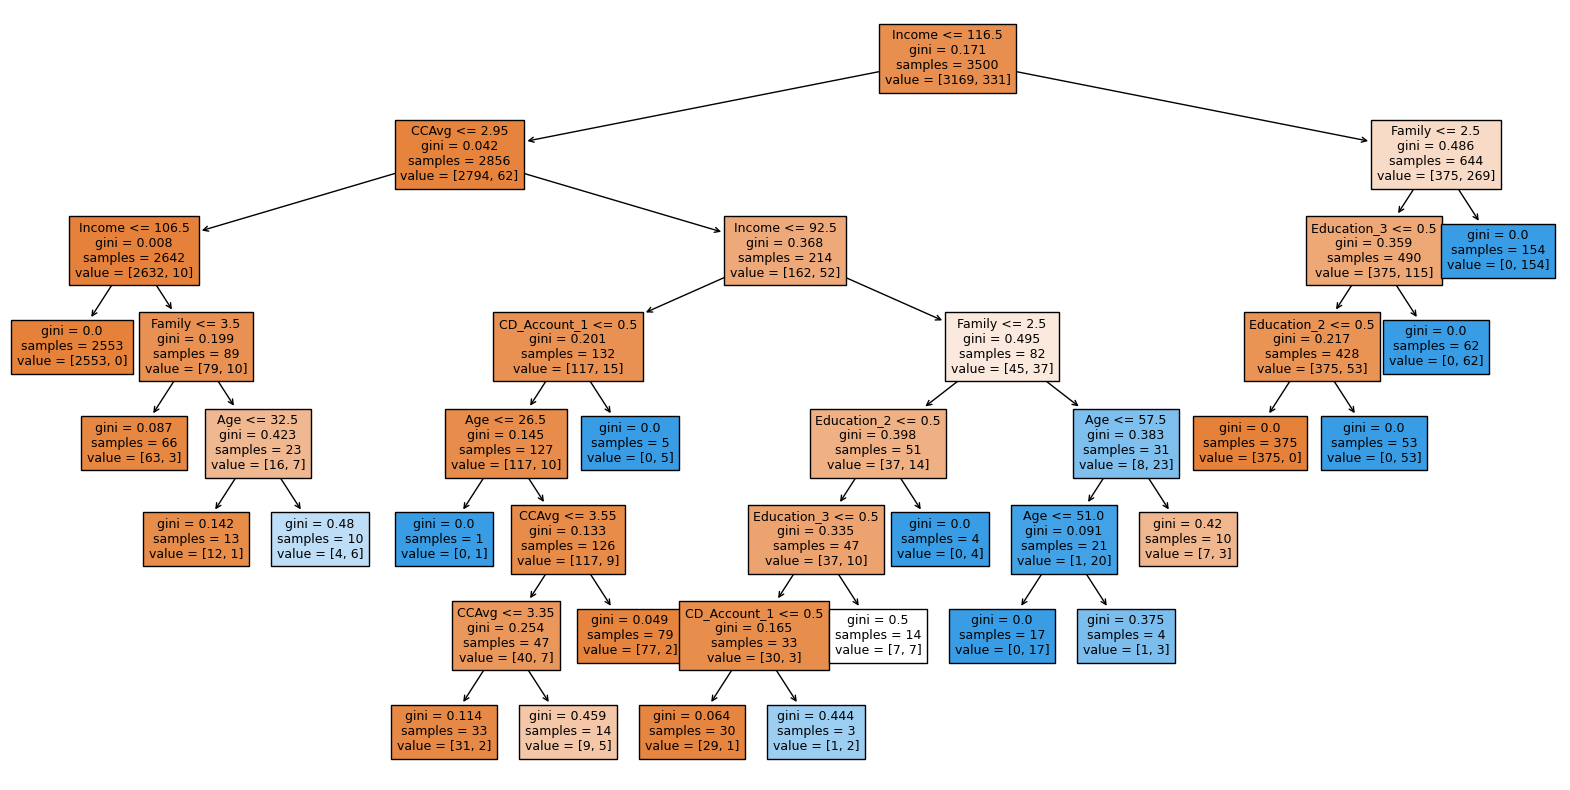

In [889]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [890]:
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- weights: [4.00, 6.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |   |   |--- weights: [9.00, 5.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [

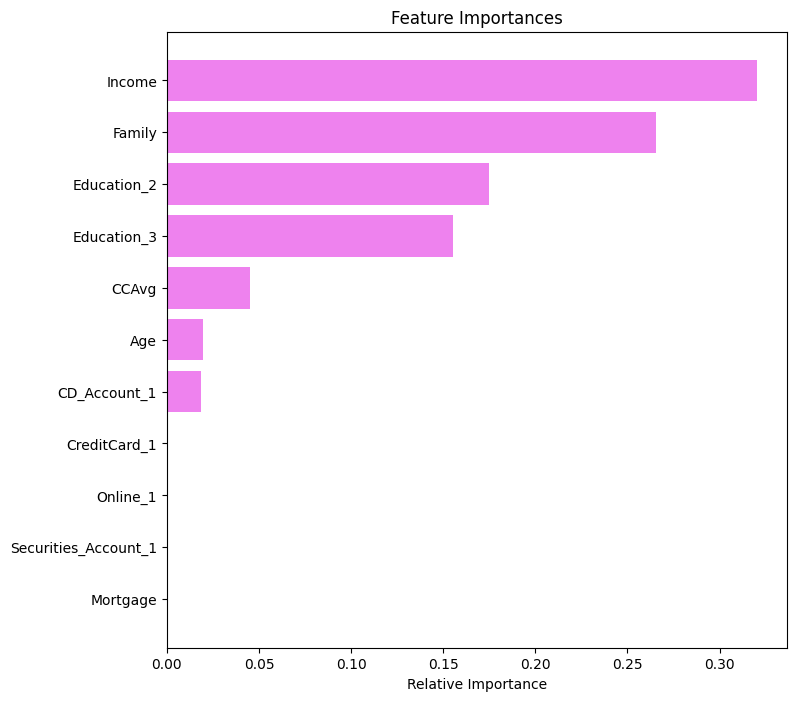

In [891]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on this tree prediction can be made that if income is greater than equal to 116k and family size is more than two members than customer is highly likely to purchase personal loans.

## Post Pruning

In [892]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [893]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000238,0.001590
3,0.000250,0.002090
4,0.000268,0.002626
5,0.000268,0.003699
6,0.000272,0.004244
7,0.000275,0.005344
8,0.000276,0.005897
9,0.000381,0.006278


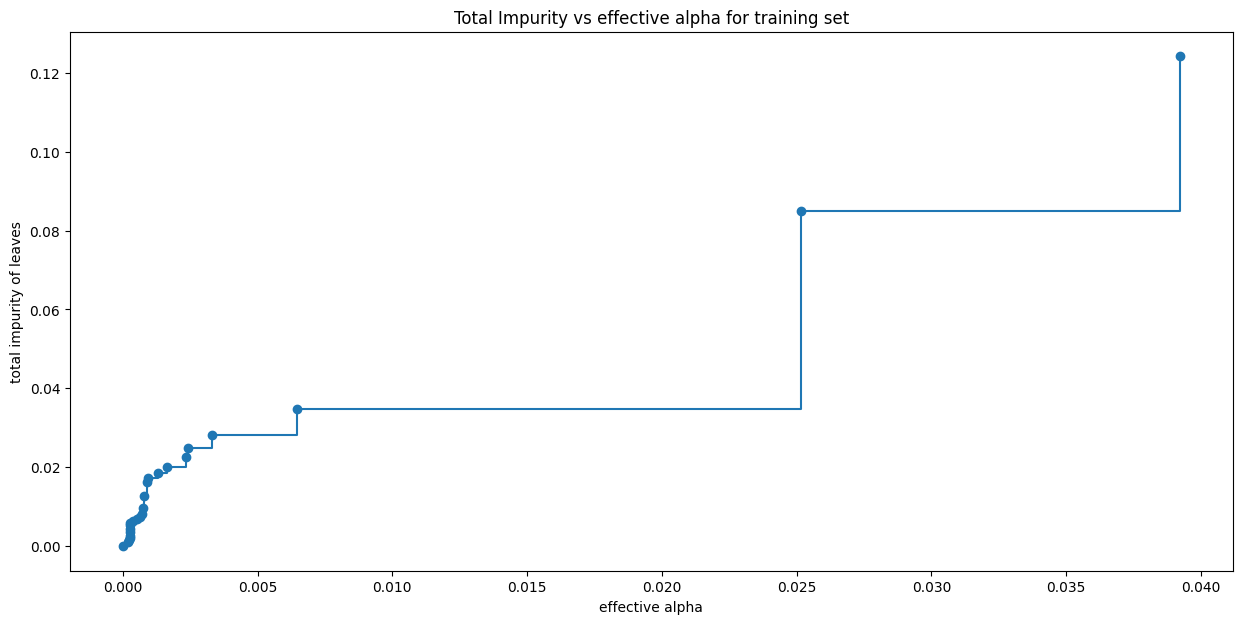

In [894]:
plt.figure(figsize=(15,7))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

In [895]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)


In [896]:
# Getting rid of the last value as that time tree has only one node 
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = []
depth = []

for clf in clfs:
    node_counts.append(clf.tree_.node_count)
    depth.append(clf.tree_.max_depth)

In [897]:
recall_scores_train = []

for clf in clfs:
    y_pred = clf.predict(X_train)
    score = recall_score(y_train,y_pred)
    recall_scores_train.append(score)

In [898]:
recall_scores_test = []

for clf in clfs:
    y_pred = clf.predict(X_test)
    score = recall_score(y_test,y_pred)
    recall_scores_test.append(score)

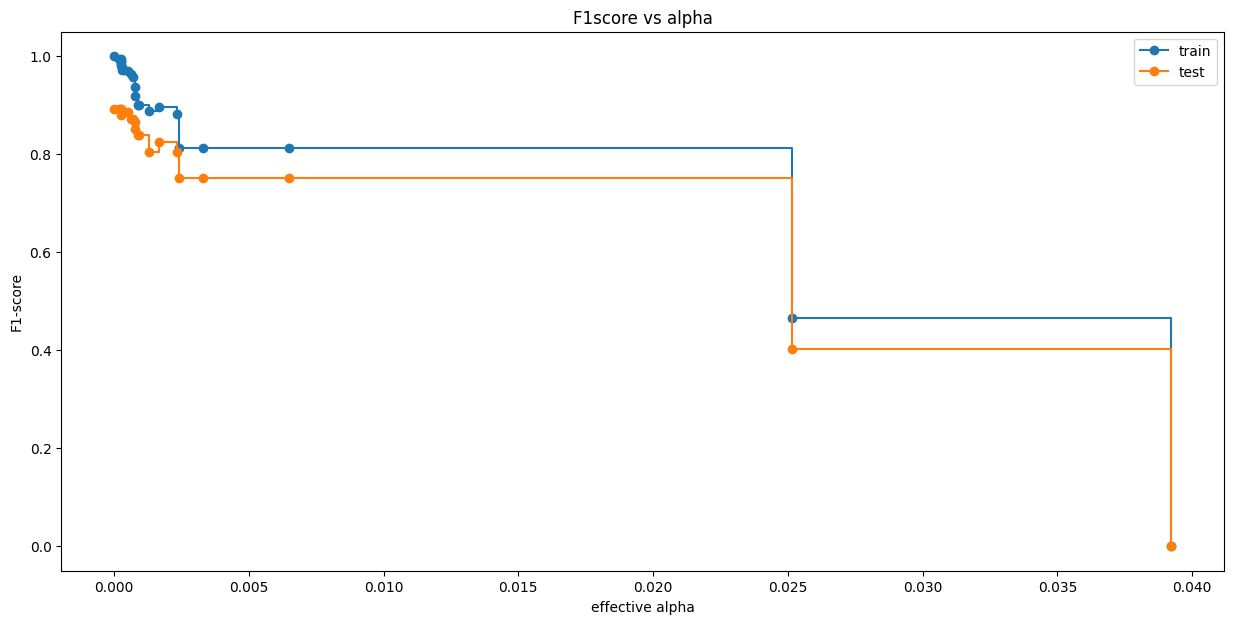

In [899]:
plt.figure(figsize=(15,7))
plt.plot(ccp_alphas, recall_scores_train, marker="o",label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, recall_scores_test, marker="o",label='test', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("F1-score")
plt.title("F1score vs alpha")
plt.legend()
plt.show()

In [900]:
# Picking the best model
index_best_model = np.argmax(recall_scores_test)
model2 = clfs[index_best_model]
model2_metrics_train = model_performance_metrics(model2,X_train,y_train)
print("------Train Data Metrics -------")
print(model2_metrics_train)
model2_metrics_test = model_performance_metrics(model2,X_test,y_test)
print("----Test Data Metrics -----")
print(model2_metrics_test)

------Train Data Metrics -------
   Accuracy  Recall  Precision  F1-Score
0       1.0     1.0        1.0       1.0
----Test Data Metrics -----
   Accuracy    Recall  Precision  F1-Score
0  0.983333  0.892617    0.93662  0.914089


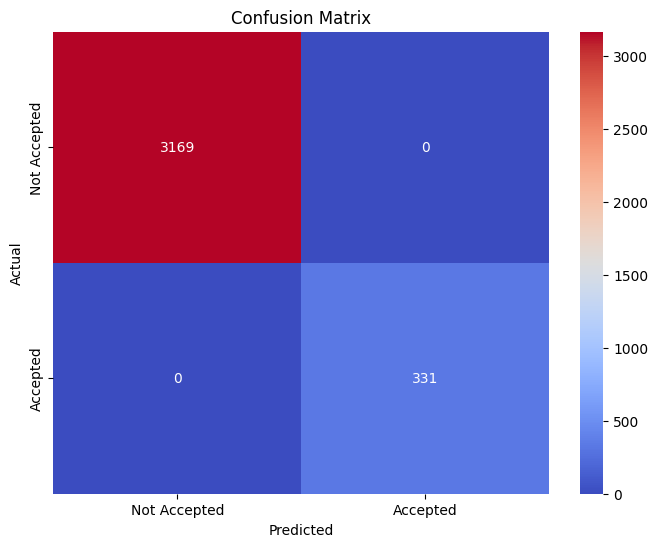

In [901]:
y_train_pred_model2 = model2.predict(X_train)
plot_confusion_matrix(y_train,y_train_pred_model2)

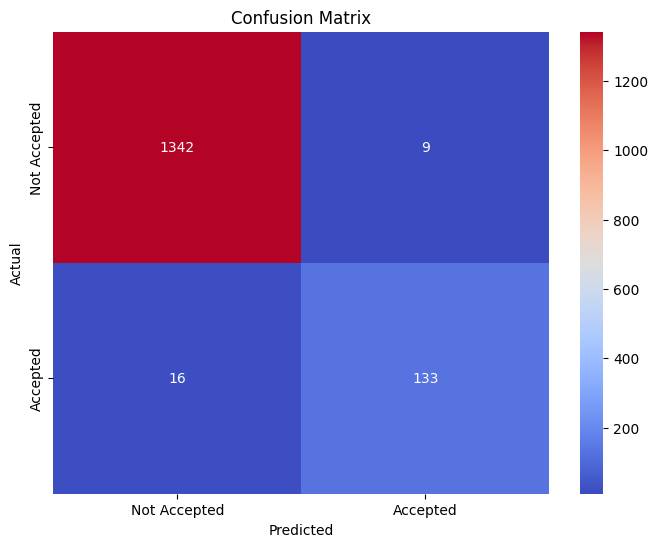

In [902]:
y_test_pred_model2 = model2.predict(X_test)
plot_confusion_matrix(y_test,y_test_pred_model2)

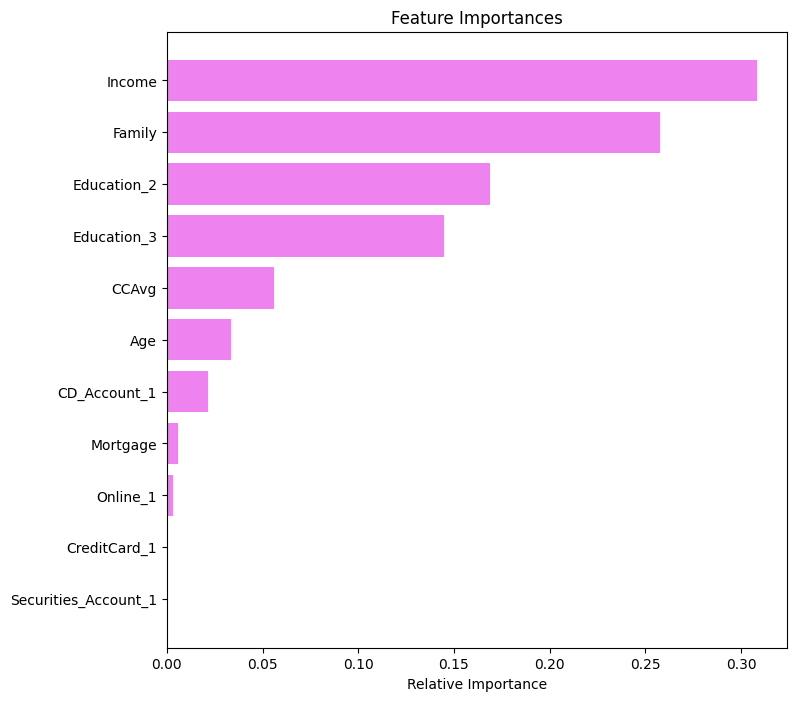

In [903]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

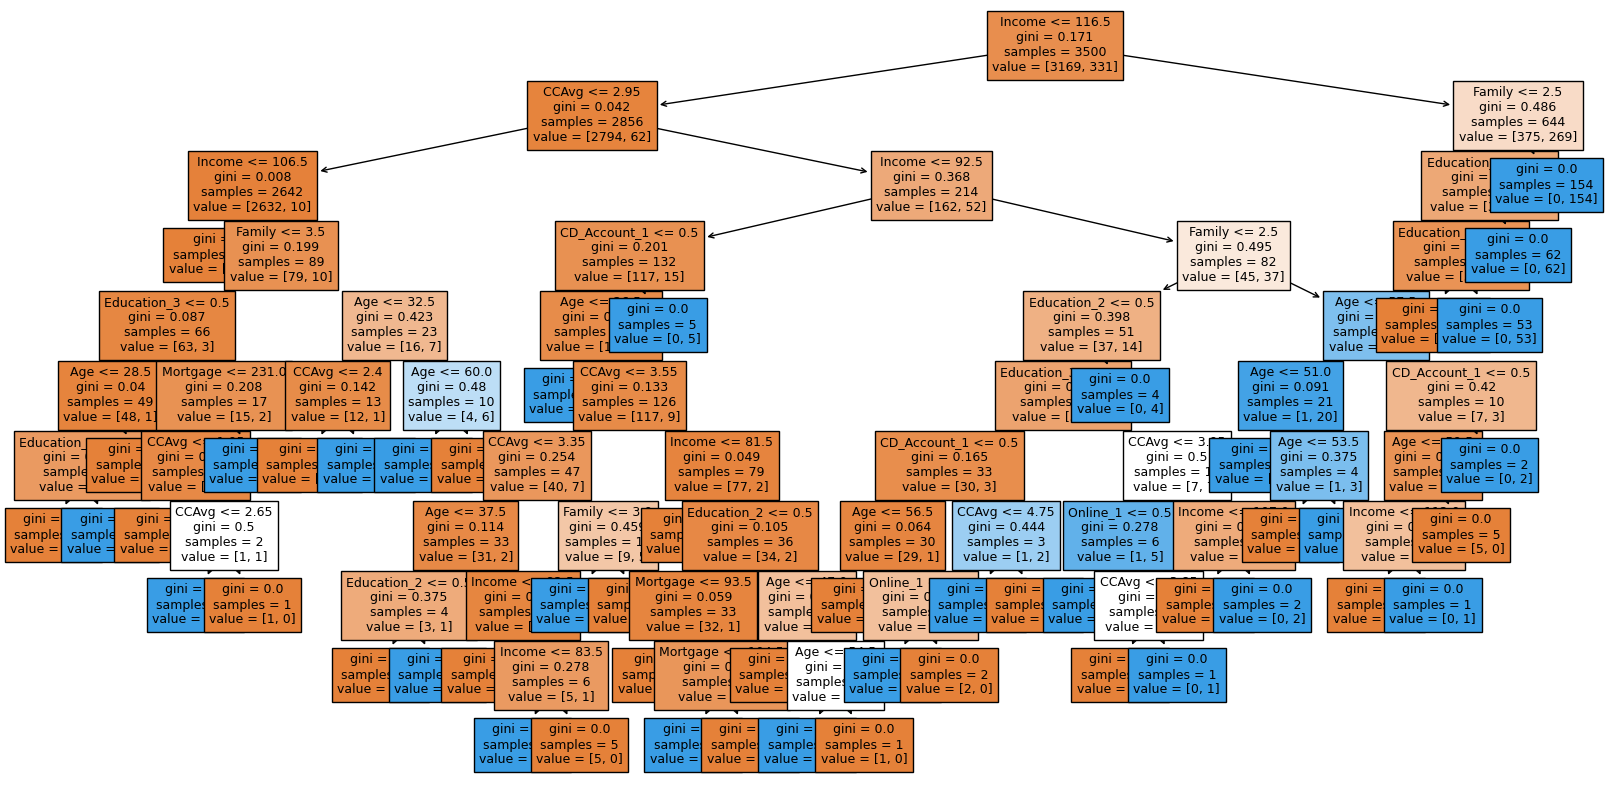

In [904]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [905]:
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- CCAvg <= 2.65
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  2.65
|   |   | 

Based on the metrics of train and test data this model could be an overfitting model.

## Model Performance Comparison and Final Model Selection

In [907]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        model0_metrics_test.T,
        model1_metrics_test.T,
        model2_metrics_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.983333,0.983333,0.983333
Recall,0.892617,0.872483,0.892617
Precision,0.936620,0.955882,0.936620
F1-Score,0.914089,0.912281,0.914089


Selecting Pre-Pruning model to be our best model as it gives more reliable metrics with test data and train data. 
The defaul and post pruning model may be overfitting model since metrics on training data has accuracy of 100%.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

### Recommendations

* Bank should target individuals earning more than $116K and having a family size greater than two as they are significantly more inclined to acquire personal loans.
* Customers belonging to education categories 2 and 3 also demonstrate a strong propensity to opt for personal loans, making them key targets for outreach efforts.
* Data indicates that all customers with CD accounts have a high probability of purchasing personal loans. The bank can further incentivize customers to open CD accounts, potentially enhancing loan uptake.
* Review customers with lower income and see if lower loan amount could be provided to them at reduced rates as that could lead to this group purchasing personal loans.
* Bank could look into making the process of getting personal loan easy for customers who are used to accessing banking services online. Data suggests that large segment of customers are using online banking services.

___